<a href="https://colab.research.google.com/github/soline013/Machine-Learning-ML/blob/master/Computer-Vision/mediapipe_hands_colab_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 109kB/s 


Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving hand1.jpeg to hand1.jpeg
Saving hand2.jpeg to hand2.jpeg


In [ ]:
uploaded

{'hand1.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\x00\x03\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x00\x07\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x06\x07\x03\x08\t\xff\xc4\x00C\x10\x00\x01\x03\x03\x03\x02\x05\x03\x03\x02\x04\x05\x03\x02\x06\x03\x01\x00\x02\x03\x04\x05\x11\x06!1\x12A\x07\x13"Qa\x08q\x81\x142\x91#\xa1\x15B\xb1\xc1$3Rb\xd1\t\x16r\xa2\xe1\x

hand1.jpeg


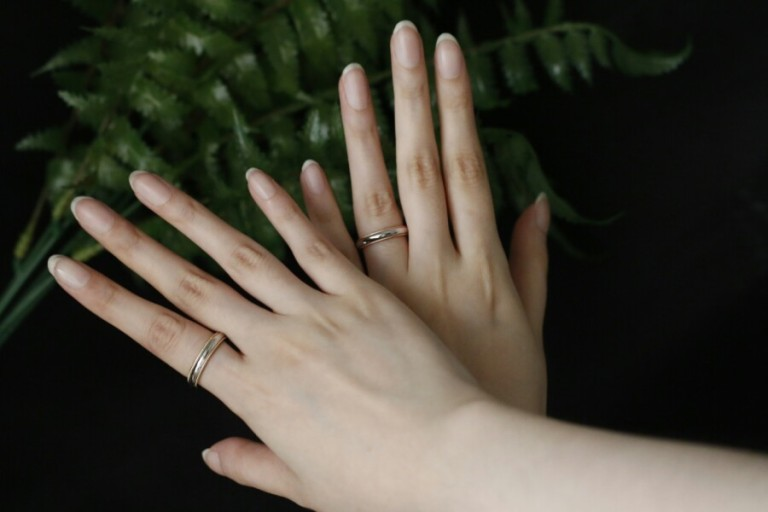

hand2.jpeg


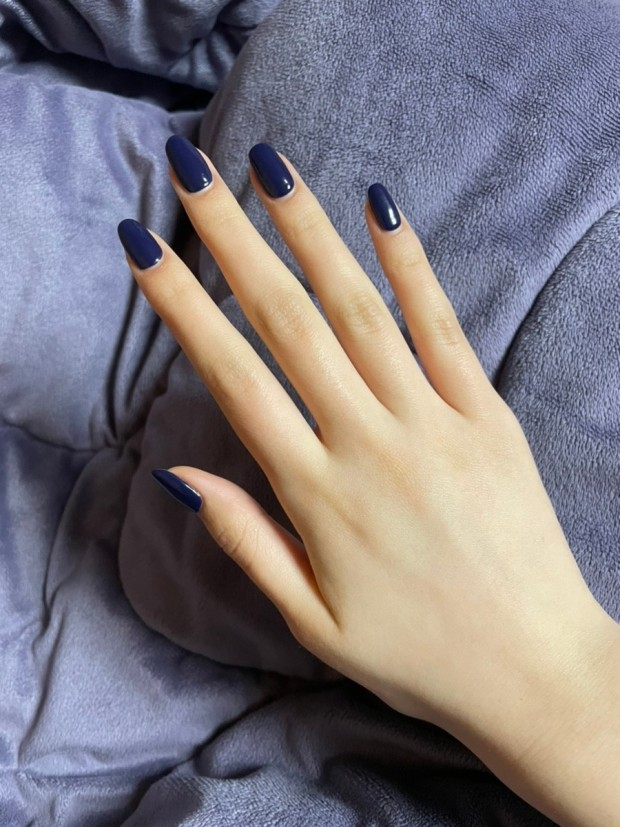

In [ ]:
'''
In Google Colab, cv2.imshow() is not support. 
Instead, We can use cv2_imshow().
key(), items(): Funtions for Dictionary.
'''
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_hands = mp.solutions.hands

help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method

Handedness of hand1.jpeg:
[classification {
  index: 1
  score: 0.9949356913566589
  label: "Right"
}
]
Hand landmarks of hand1.jpeg:
Index finger tip coordinate: ( 699.4711303710938, 274.6747741699219)


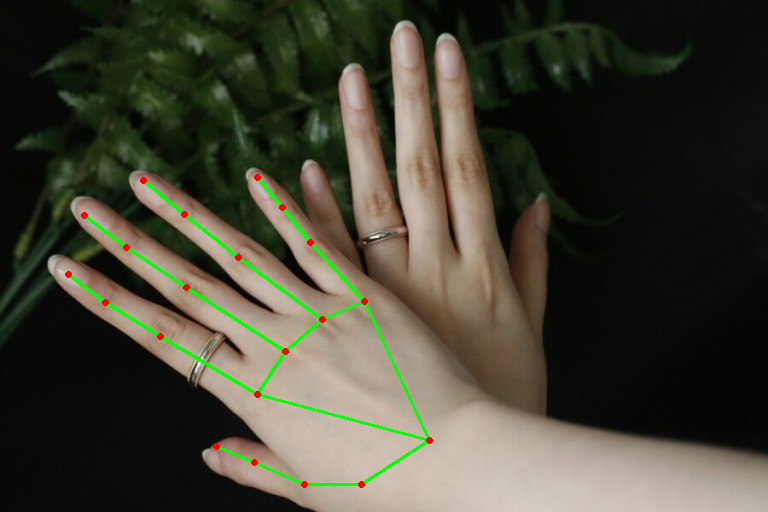

Handedness of hand2.jpeg:
[classification {
  index: 0
  score: 0.9274013042449951
  label: "Left"
}
]
Hand landmarks of hand2.jpeg:
Index finger tip coordinate: ( 466.4875078201294, 266.0428247451782)


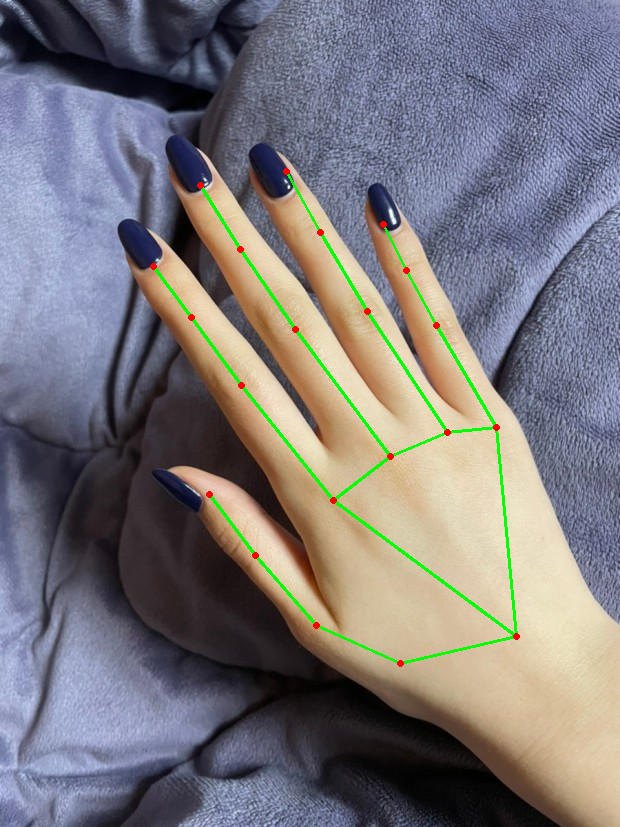

In [ ]:
mp_drawing = mp.solutions.drawing_utils 

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
    image_hight, image_width, _ = image.shape

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    if not results.multi_hand_landmarks:
      continue
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:

      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    #Print Annotated Image.
    cv2_imshow(cv2.flip(annotated_image, 1))